In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data =iris.data, columns = iris.feature_names)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# KMeans

- 학습

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter= 300, random_state= 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


- groupby로 확인

In [9]:
irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

- 시각화 위해 2차원으로 PCA변경

In [10]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']= pca_transformed[:,1]
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


- 시각화

In [11]:
cluster0=irisDF[irisDF['cluster']==0]
cluster1=irisDF[irisDF['cluster']==1]
cluster2=irisDF[irisDF['cluster']==2]

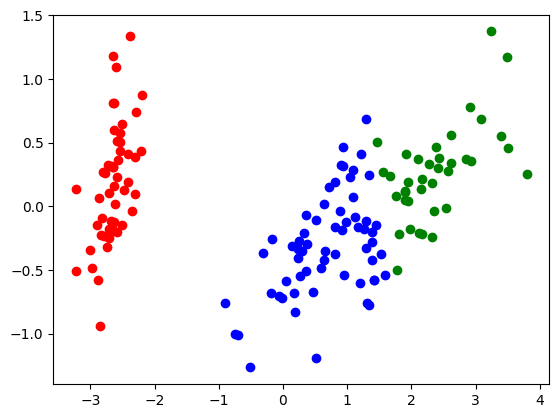

In [12]:
plt.scatter(x=cluster0['pca_x'],y=cluster0['pca_y'],color='blue')
plt.scatter(x=cluster1['pca_x'],y=cluster1['pca_y'],color='red')
plt.scatter(x=cluster2['pca_x'],y=cluster2['pca_y'],color='green')

# 군집화 알고리즘 테스트를 위한 데이터 생성

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=200, n_features=2, centers=3, 
                 cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [27]:
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

[0 1 2] [67 67 66]


In [28]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


## 시각화 (KMeans 전)

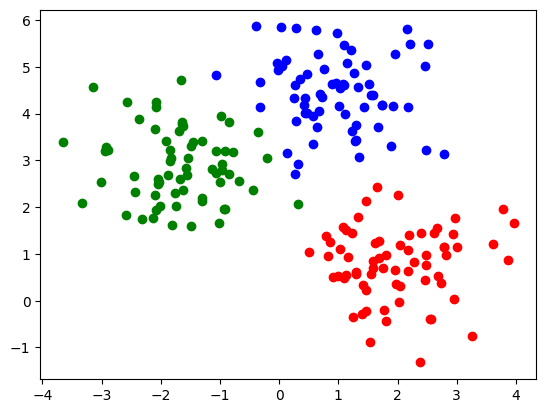

In [29]:
target0=clusterDF[clusterDF['target']==0]
target1 = clusterDF[clusterDF['target']==1]
target2 = clusterDF[clusterDF['target']==2]

plt.scatter(x= target0['ftr1'],y=target0['ftr2'],color='blue')
plt.scatter(x= target1['ftr1'],y=target1['ftr2'],color='red')
plt.scatter(x= target2['ftr1'],y=target2['ftr2'],color='green')

## 시각화(KMeans 후)

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [31]:
centers = kmeans.cluster_centers_
clusterDF['kmeans_label'] = kmeans.labels_

centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

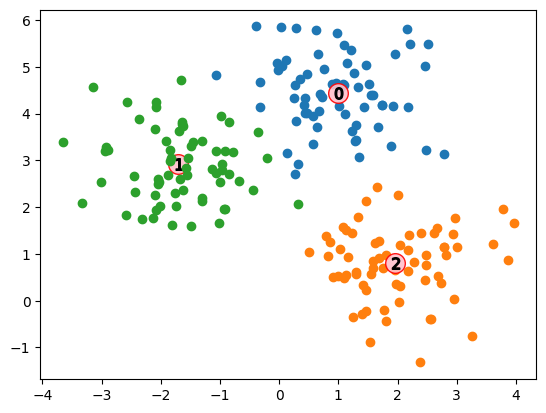

In [32]:

unique_labels = np.unique(kmeans.labels_)

for index in unique_labels:
    
    target=clusterDF[clusterDF['target']==index]
    
    plt.scatter(x= target['ftr1'],y=target['ftr2'])
    
    plt.scatter(x= centers[index][0], y=centers[index][1],s=200,color='pink',alpha=0.9,edgecolor='r'
               )
    plt.scatter(x=centers[index][0], y=centers[index][1],s=70, color='k',edgecolor='k',
               marker = '$%d$' % index)


In [33]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

## 표준편차가 다를때

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=200, n_features=2, centers=3, 
                 cluster_std=1.3, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


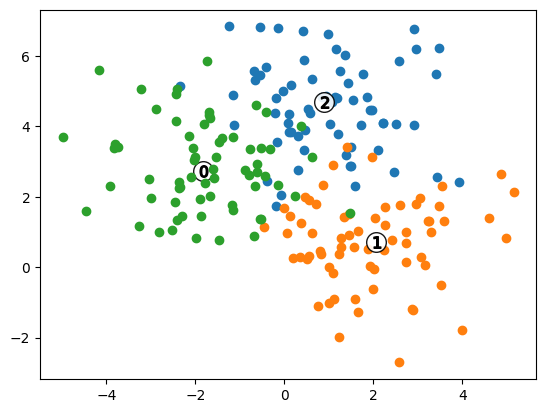

In [35]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
clusterDF['kmeans_label'] = kmeans.labels_


unique_labels = np.unique(kmeans.labels_)

for index in unique_labels:
    
    target0=clusterDF[clusterDF['target']==index]
    
    plt.scatter(x= target0['ftr1'],y=target0['ftr2'])
    
    plt.scatter(x= centers[index][0], y=centers[index][1],s=200,color='white',alpha=0.9,edgecolor='k'
               )
    plt.scatter(x=centers[index][0], y=centers[index][1],s=70, color='k',edgecolor='k',
               marker = '$%d$' % index)
